<a href="https://colab.research.google.com/github/Le-Triumvirat/CADS-Internship/blob/main/Anomaly_detection_in_financial_services_using_knowledge_graphs_and_machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Knowledge graph</h1>
<p>Headline files:</p>
<ol>
    CNN
    <li>boeing.csv</li>
    <li>google.csv</li>
    <li>walmart.csv</li>
    <br>Reuters
    <li>apple.csv</li>
    <li>microsoft.csv</li>
    <li>samsung.csv</li>
</ol>

Headlines dataset are present in the directory "headlines"
To install pandas, perform the following command in the terminal

> **pip install pandas**


In [10]:
import pandas as pd

directory = './headlines/'
headline_filenames = ['boeing.csv','google.csv','walmart.csv','apple.csv','microsoft.csv','samsung.csv']
stock_filenames = {'apple':'AAPL.csv','boeing':'BA.csv','google':'GOOG.csv','microsoft':'MSFT.csv','samsung':'SSNLF.csv','walmart':'WMT.csv'}
companies = ['boeing','google','walmart','apple','microsoft','samsung']
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
# headline_filenames[0][:-4]

In [49]:
for i in filenames:
    a=pd.read_csv(directory+i)
    print(a.head(2))

        Date                                              Title
0  24-Feb-17  Trump rally: CEOs of Dow companies make $400 m...
1  24-Feb-17  Has my pilot had too much to drink? It depends...
        Date                                              Title
0  27-Feb-17  Historic Oscar victories for ESPN, Netflix and...
1  25-Feb-17  Apple, Microsoft, PayPal join legal fight for ...
        Date                                              Title
0  27-Feb-17  Ellen DeGeneres and Walmart give these student...
1  24-Feb-17  Trump rally: CEOs of Dow companies make $400 m...
              Date                                              Title
0  2011/10/18 0:00                 Apple iPhone 4S: Believe the hype?
1  2011/10/18 0:00  Tech wrap: Apple misses, Intel beats quarterly...
                 Date                                              Title
0  2011-10-26 0:00:00  Tech wrap: RIM delays tablet update, Nokia unv...
1  2011-11-01 0:00:00  Tech wrap: Yahoo finds interclick, pays $270 

Since Apple and Microsoft don't have headers in their csv files, the following code includes them. Just execute it once.

In [27]:
print('Original dataset of apple.csv')
apple=pd.read_csv(directory+'apple.csv')
print(apple.head(2))

Original dataset of apple.csv
   2011/10/17 0:00       Tech wrap: Apples Siri spurs iPhone 4S sales
0  2011/10/18 0:00                 Apple iPhone 4S: Believe the hype?
1  2011/10/18 0:00  Tech wrap: Apple misses, Intel beats quarterly...


In [31]:
print('Updated dataset of apple.csv')
apple.to_csv(directory+'apple.csv',header=["Date","Title"],index=False)
apple=pd.read_csv(directory+'apple.csv')
print(apple.head(2))

Updated dataset of apple.csv
              Date                                              Title
0  2011/10/18 0:00                 Apple iPhone 4S: Believe the hype?
1  2011/10/18 0:00  Tech wrap: Apple misses, Intel beats quarterly...


In [32]:
print('Original dataset of microsoft.csv')
microsoft=pd.read_csv(directory+'microsoft.csv')
print(microsoft.head(2))

Original dataset of microsoft.csv
   2011-10-20 0:00:00       Tech wrap: Basic phones lift Nokia to profit
0  2011-10-26 0:00:00  Tech wrap: RIM delays tablet update, Nokia unv...
1  2011-11-01 0:00:00  Tech wrap: Yahoo finds interclick, pays $270 m...


In [33]:
print('Updated dataset of microsoft.csv')
microsoft.to_csv(directory+'microsoft.csv',header=["Date","Title"],index=False)
microsoft=pd.read_csv(directory+'microsoft.csv')
print(microsoft.head(2))

Updated dataset of microsoft.csv
                 Date                                              Title
0  2011-10-26 0:00:00  Tech wrap: RIM delays tablet update, Nokia unv...
1  2011-11-01 0:00:00  Tech wrap: Yahoo finds interclick, pays $270 m...


<h3>Changing all the date category's format to yyyy/m/d and headlines to smallercase</h3>
1. Google <br>
2. Boeing <br>
3. Walmart <br>
4. Samsung <br>
5. Microsoft

In [24]:
'''
For Google, Boeing and Walmart
'''
def datePreProcess(company):
    df=pd.read_csv('./headlines/'+company+'.csv')
    df_len = len(df.index) # no of rows
    if(company in ['google','boeing','walmart']):
        for i in range(df_len):
            temp = df['Date'][i].split('-')
            temp[2] = '20'+temp[2]
            df['Date'][i] = temp[2]+'/'+str(months.index(temp[1])+1)+'/'+temp[0]
            df['Title'][i] = df['Title'][i].lower()
        df.to_csv('./headlines/Pre-processed/'+company+'.csv',header=["Date","Title"],index=False)
        
    if(company=='samsung'):
        for i in range(df_len):
            temp = df['Date'][i].split('-')
            if(temp[2][0]=='0'): # for day
                temp[2]=temp[2][-1]
            if(temp[1][0]=='0'): # for month
                temp[1]=temp[1][-1]
            df['Date'][i] = '/'.join(temp)
            df['Title'][i] = df['Title'][i].lower()
        df.to_csv('./headlines/Pre-processed/'+company+'.csv',header=["Date","Title"],index=False)
        
    if(company=='microsoft'):
        for i in range(df_len):
            temp = df['Date'][i][:-8].split('-')
            if(temp[2][0]=='0'):
                temp[2]=temp[2][-1]
            if(temp[1][0]=='0'): # for month
                temp[1]=temp[1][-1]
            df['Date'][i] = '/'.join(temp)
            df['Title'][i] = df['Title'][i].lower()
        df.to_csv('./headlines/Pre-processed/'+company+'.csv',header=["Date","Title"],index=False)
    
    if(company=='apple'):
        for i in range(df_len):
            df['Date'][i] = df['Date'][i][:-5]
            df['Title'][i] = df['Title'][i].lower()
        df.to_csv('./headlines/Pre-processed/'+company+'.csv',header=["Date","Title"],index=False)
    print(f'Successfully converted headlines to lowercase and updated the date format of {company}')

In [55]:
'''
Google headline date preprocessing
'''
datePreProcess('google')

Successfully converted headlines to lowercase and updated the date format of google


In [56]:
'''
Boeing headline date preprocessing
'''
datePreProcess('boeing')

Successfully converted headlines to lowercase and updated the date format of boeing


In [57]:
'''
Walmart headline date preprocessing
'''
datePreProcess('walmart')

Successfully converted headlines to lowercase and updated the date format of walmart


In [26]:
'''
Samsung headline date preprocessing
'''
datePreProcess('samsung')

Successfully converted headlines to lowercase and updated the date format of samsung


In [25]:
'''
Microsoft headline date preprocessing
'''
datePreProcess('microsoft')

Successfully converted headlines to lowercase and updated the date format of microsoft


In [60]:
'''
Apple headline date preprocessing
'''
datePreProcess('apple')

Successfully converted headlines to lowercase and updated the date format of apple


In [8]:
'''
KDJ  |  W%R  |  RSI
'''
import pandas as pd
goog = pd.read_csv('Stock Price\GOOG.csv')
print(f"KDJ (Min and Max) {goog['KDJ'].min()}\t {goog['KDJ'].max()}")
print(f"W%R (Min and Max) {goog['W%R'].min()}\t {goog['W%R'].max()}")
print(f"RSI (Min and Max) {goog['RSI'].min()}\t {goog['RSI'].max()}")
row_count = len(goog)
'''
Labels
0 - overbought > 0.8 (sell)
1 - oversold < 0.2 (buy)
2 - nil trend [0.2,0.8]
Note : Only AAPL has a column called as label
'''
# goog['KDJ'].sum()/len(goog['KDJ'].index)
# goog['KDJ'].max()
print('')

KDJ (Min and Max) 0.0	 1.0
W%R (Min and Max) -1.0	 0.0
RSI (Min and Max) -92.080017	 41.369995



<h4>KDJ | W%R</h4>
If it is between 20 and 80 the market is neutral, if it is above 80 it is bullish/overbought and if it is below 20 it is bearish/oversold. If it is below 0 or above 100 it is very bearish or very bullish, but also very-oversold and very-overbought.

Overbought --> overvalued that its intrinsic(bullish)<br>
Oversold --> undervalued that its intrinsic(bearish)

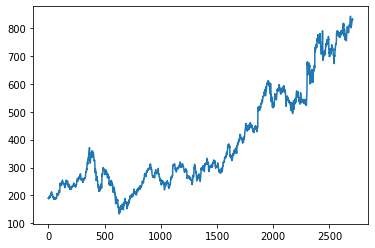

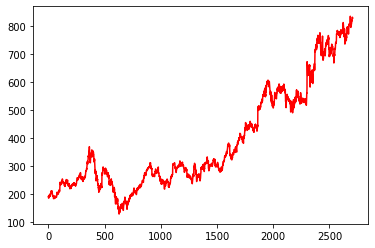

In [2]:
import matplotlib.pyplot as plt

plt.plot(goog['High'])
plt.show()
plt.plot(goog['Close'],color='red')
plt.show()

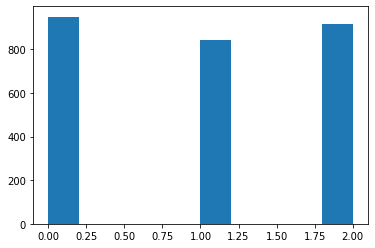

In [3]:
label=[]
for i in range(row_count):
    if(goog['KDJ'][i] < 0.2):
        label.append(1)
    elif(goog['KDJ'][i] > 0.8):
        label.append(0)
    else:
        status = ((goog['Close'][i]-goog['Open'][i])/goog['Open'][i])*100
        if(status < -0.66):
            label.append(0)
        elif(status > 0.66):
            label.append(1)
        else:
            label.append(2)
# print(label)
plt.hist(label)
plt.show()

In [4]:
print(label.count(0))
print(label.count(1))
print(label.count(2))

950
841
916


x<20...80<x
$100
(+$70)
$30
((closing-opening)/(opening))*100
<-0.75 sell
>0.75 buy

In [7]:
goog['Label']=label
goog

,Date,Open,High,Low,Close,Volume,KDJ,W%R,RSI,Label
0,2006/5/25,188.315186,190.262527,184.952072,190.257553,16495700,0.999063,-0.000937,0.000000,0
1,2006/5/26,191.032516,191.693222,188.787125,189.442856,7381600,0.225640,-0.774360,1.814697,0
2,2006/5/30,187.917770,189.268982,184.524841,184.768265,8688100,0.051310,-0.948690,5.674591,1
3,2006/5/31,185.692245,187.902878,182.204926,184.708649,16066300,0.439408,-0.560592,1.059616,2
4,2006/6/1,185.563095,190.257553,184.599365,190.073761,12637600,0.967518,-0.032482,-4.365112,0
...,...,...,...,...,...,...,...,...,...,...
2702,2017/2/17,823.020020,828.070007,821.655029,828.070007,1611000,1.000000,0.000000,-2.910034,0
2703,2017/2/21,828.659973,833.450012,828.349976,831.659973,1262300,0.649014,-0.350986,-2.589966,2
2704,2017/2/22,828.659973,833.250000,828.640015,830.760010,982900,0.459870,-0.540130,1.899963,2
2705,2017/2/23,830.119995,832.460022,822.880005,831.330017,1472800,0.882046,-0.117954,0.429993,0


In [8]:
goog.to_csv('goog_labeled.csv',index=False)
print('woah')
# df.to_csv('./headlines/Pre-processed/'+company+'.csv',header=["Date","Title"],index=False)

woah


In [1]:
'''
TF-IDF trial
'''
import pandas as pd
# from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

googH = pd.read_csv('./headlines/Pre-processed/google.csv')
type(googH['Title'])
headlines_list=googH['Title'].values.tolist()
len(headlines_list)

5277

In [19]:
tfIdfVectorizer=TfidfVectorizer(analyzer='word', use_idf=True)
tfIdf = tfIdfVectorizer.fit_transform(headlines_list)
print(tfIdf[0].shape)
print(type(tfIdf))
# print(tfIdf[0].todense())
df = pd.DataFrame(tfIdf[0].T.todense(), index=tfIdfVectorizer.get_feature_names(), columns=["TF-IDF"])
# df = df.sort_values('TF-IDF', ascending=False)
df
# [0:{'word':'value'}]
# df.to_csv('./TFIDF'+'.csv',header=["TF-IDF"],index=True)

(1, 5772)
<class 'scipy.sparse.csr.csr_matrix'>


,TF-IDF
000,0.0
005,0.0
06,0.0
07,0.0
08,0.0
...,...
zuck,0.0
zuckerberg,0.0
zucks,0.0
zune,0.0


In [63]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    'Hardest choice in the lives requires the strongest wills',
    'When I am done, half of humanity will still exist. And I hope they remember you',
    'Little one, its a simple calculus. This universe is finite, its resources finite. If life is left unchecked, life will cease to exist. It needs correction.',
    'I used the stones to destroy the stones. It nearly killed me, but the work is done. It always will be. I am...inevitable'
]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(X[1])
X
print(vectorizer.get_feature_names())
# print(len(vectorizer.get_feature_names()))

  (0, 51)	0.2854558802199217
  (0, 33)	0.2854558802199217
  (0, 41)	0.2854558802199217
  (0, 15)	0.2854558802199217
  (0, 2)	0.2854558802199217
  (0, 11)	0.2250566947475355
  (0, 37)	0.2854558802199217
  (0, 48)	0.18220279066644673
  (0, 16)	0.2854558802199217
  (0, 31)	0.2854558802199217
  (0, 13)	0.2854558802199217
  (0, 10)	0.2250566947475355
  (0, 1)	0.2250566947475355
  (0, 47)	0.2854558802199217
['always', 'am', 'and', 'be', 'but', 'calculus', 'cease', 'choice', 'correction', 'destroy', 'done', 'exist', 'finite', 'half', 'hardest', 'hope', 'humanity', 'if', 'in', 'inevitable', 'is', 'it', 'its', 'killed', 'left', 'life', 'little', 'lives', 'me', 'nearly', 'needs', 'of', 'one', 'remember', 'requires', 'resources', 'simple', 'still', 'stones', 'strongest', 'the', 'they', 'this', 'to', 'unchecked', 'universe', 'used', 'when', 'will', 'wills', 'work', 'you']


In [28]:
vectorizer1 = TfidfVectorizer(analyzer='word', stop_words='english', use_idf=True)
X = vectorizer1.fit_transform(corpus)
# print(X)
print(vectorizer1.get_feature_names())
print(len(vectorizer1.get_feature_names()))

['calculus', 'cease', 'choice', 'correction', 'destroy', 'exist', 'finite', 'half', 'hardest', 'hope', 'humanity', 'inevitable', 'killed', 'left', 'life', 'little', 'lives', 'nearly', 'needs', 'remember', 'requires', 'resources', 'simple', 'stones', 'strongest', 'unchecked', 'universe', 'used', 'wills', 'work']
30


In [21]:
[headlines_list[:10]]

[['historic oscar victories for espn, netflix and amazon',
  'apple, microsoft, paypal join legal fight for transgender rights',
  "why you shouldn't freak out (yet) about the 'cloudbleed' security leak",
  "google's waymo sues uber over self-driving car technology",
  'tech criticizes trump on transgender reversal',
  'google commits $11.5 million to racial justice efforts',
  'lyft expands into 54 new cities, while uber does damage control',
  'apple criticizes trump over reversal of transgender bathroom guidelines',
  'these 10 stocks dominate the market',
  "russia accuses western media of spreading 'fake news'"]]

In [27]:
vectorizer2 = TfidfVectorizer(analyzer='word', stop_words='english', use_idf=True)
X = vectorizer2.fit_transform([headlines_list[7]])
print(X)
# print(X.shape)
print(vectorizer2.get_feature_names())
# print(len(vectorizer2.get_feature_names()))
# X.shape # --> (documents,features). Features are unique words in a single document

  (0, 3)	0.3779644730092272
  (0, 1)	0.3779644730092272
  (0, 5)	0.3779644730092272
  (0, 4)	0.3779644730092272
  (0, 6)	0.3779644730092272
  (0, 2)	0.3779644730092272
  (0, 0)	0.3779644730092272
['apple', 'bathroom', 'criticizes', 'guidelines', 'reversal', 'transgender', 'trump']


<h1>GCN implementation</h1>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

goog_lab = pd.read_csv('goog_labeled.csv')
goog_lab, goog_lab_test = train_test_split(goog_lab, test_size=0.2, train_size=0.8, shuffle=False)
print(len(goog_lab))
print(type(goog_lab))
print(len(goog_lab_test))
goog_lab.iterrows()

2165
<class 'pandas.core.frame.DataFrame'>
542


<generator object DataFrame.iterrows at 0x0000021F7F823E40>

In [2]:
goog_lab

,Date,Open,High,Low,Close,Volume,KDJ,W%R,RSI,Label
0,2006/5/25,188.315186,190.262527,184.952072,190.257553,16495700,0.999063,-0.000937,0.000000,0
1,2006/5/26,191.032516,191.693222,188.787125,189.442856,7381600,0.225640,-0.774360,1.814697,0
2,2006/5/30,187.917770,189.268982,184.524841,184.768265,8688100,0.051310,-0.948690,5.674591,1
3,2006/5/31,185.692245,187.902878,182.204926,184.708649,16066300,0.439408,-0.560592,1.059616,2
4,2006/6/1,185.563095,190.257553,184.599365,190.073761,12637600,0.967518,-0.032482,-4.365112,0
...,...,...,...,...,...,...,...,...,...,...
2160,2014/12/23,524.118103,531.636780,523.411987,527.688477,2203600,0.519951,-0.480049,-4.688721,1
2161,2014/12/24,527.608948,528.851074,524.138000,525.878418,707800,0.369274,-0.630726,2.810059,2
2162,2014/12/26,525.878418,531.328491,524.426392,531.109680,1043400,0.968298,-0.031702,-4.231262,0
2163,2014/12/29,529.279724,532.551758,527.112671,527.429932,2284800,0.058330,-0.941670,4.679748,1


In [3]:
for _ , row in goog_lab.iterrows():
    print(row['Date'][:4])
    break

2006


In [4]:
# [Jan,Feb,March]
# (1,2,3)

# [April,May,Jun]
# (4,5,6)

# [Jul,Aug,Sep]
# (7,8,9)

# [Oct,Nov,Dec]
# (10,11,12)

# Connect graphs based on these relationships [Quarter-wise]
first_quarter = ('1','2','3')
second_quarter = ('4','5','6')
third_quarter = ('7','8','9')
fourth_quarter = ('10','11','12')

list_of_years = []
num_of_rows = len(goog_lab.index)
# pd.unique(goog_lab['Date'])
# for i in range(num_of_rows):
#     if goog_lab['Date'][i][:4] not in list_of_years:
#         list_of_years.append(goog_lab['Date'][i][:4])
#     else:
#         continue
for _ , row in goog_lab.iterrows():
    if row['Date'][:4] not in list_of_years:
        list_of_years.append(row['Date'][:4])
    else:
        continue
print(list_of_years)
# goog_lab['Date'][0][:4]=='2006'

['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']


In [5]:
import networkx as nx
goog_graph = nx.Graph()

goog_graph.add_nodes_from(['0','1','2'])

In [6]:
for i in range(num_of_rows-1):
    if (goog_lab.iloc[i]['Date'][5:6] in first_quarter) and (goog_lab.iloc[i+1]['Date'][5:6] in first_quarter):
        goog_graph.add_edges_from( [ ( goog_lab.iloc[i]['Date'] , goog_lab.iloc[i+1]['Date'] ) ] )
    
    elif (goog_lab.iloc[i]['Date'][5:6] in second_quarter) and (goog_lab.iloc[i+1]['Date'][5:6] in second_quarter):
        goog_graph.add_edges_from( [ ( goog_lab.iloc[i]['Date'] , goog_lab.iloc[i+1]['Date'] ) ] )
        
    elif (goog_lab.iloc[i]['Date'][5:6] in third_quarter) and (goog_lab.iloc[i+1]['Date'][5:6] in third_quarter):
        goog_graph.add_edges_from( [ ( goog_lab.iloc[i]['Date'] , goog_lab.iloc[i+1]['Date'] ) ] )
        
    elif (goog_lab.iloc[i]['Date'][5:6] in fourth_quarter) and (goog_lab.iloc[i+1]['Date'][5:6] in fourth_quarter):
        goog_graph.add_edges_from( [ ( goog_lab.iloc[i]['Date'] , goog_lab.iloc[i+1]['Date'] ) ] )
    
    else:
        continue
    goog_graph.add_edges_from( [ ( goog_lab.iloc[i]['Date'] , str(goog_lab.iloc[i]['Label']) ) ] )

goog_graph.add_edges_from( [ ( goog_lab.iloc[num_of_rows-1]['Date'] , str(goog_lab.iloc[num_of_rows-1]['Label']) ) ] )

# goog_graph.add_edges_from([(1,2)])

# pos = nx.kamada_kawai_layout(goog_graph)
# nx.draw(goog_graph,pos,with_labels=False)

In [7]:
print(len(goog_graph))

2168


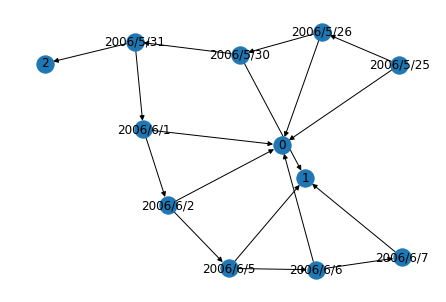

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

goog_graph_1 = nx.DiGraph()

for i in range(8):
    if (goog_lab['Date'][i][5:6] in first_quarter) and (goog_lab['Date'][i+1][5:6] in first_quarter):
        goog_graph_1.add_edges_from( [ ( goog_lab['Date'][i] , goog_lab['Date'][i+1] ) ] )
    
    elif (goog_lab['Date'][i][5:6] in second_quarter) and (goog_lab['Date'][i+1][5:6] in second_quarter):
        goog_graph_1.add_edges_from( [ ( goog_lab['Date'][i] , goog_lab['Date'][i+1] ) ] )
        
    elif (goog_lab['Date'][i][5:6] in third_quarter) and (goog_lab['Date'][i+1][5:6] in third_quarter):
        goog_graph_1.add_edges_from( [ ( goog_lab['Date'][i] , goog_lab['Date'][i+1] ) ] )
        
    elif (goog_lab['Date'][i][5:6] in fourth_quarter) and (goog_lab['Date'][i+1][5:6] in fourth_quarter):
        goog_graph_1.add_edges_from( [ ( goog_lab['Date'][i] , goog_lab['Date'][i+1] ) ] )
    
    else:
        continue
    goog_graph_1.add_edges_from( [ ( goog_lab['Date'][i] , str(goog_lab['Label'][i] ) ) ] )

goog_graph_1.add_edges_from( [ ( goog_lab['Date'][8] , str(goog_lab['Label'][8]) ) ] )

# goog_graph.add_edges_from([(1,2)])
pos = nx.kamada_kawai_layout(goog_graph_1)
nx.draw(goog_graph_1,pos,with_labels=True)

In [12]:
'''
Prepping the feature tensor matrix
'''
# 2707 x 8 --> feature tensor size
import torch
'''

[
    ['Open', 'High', 'Low', 'Close', 'Volume', 'KDJ', 'W%R', 'RSI'],
    [],
    .
    .
    .
    []
]

'''
print(list(goog_lab.columns[1:9]))
feature_set_=[]
feature_set_.append(list(goog_lab.iloc[0,1:9])) # for label 0
feature_set_.append(list(goog_lab.iloc[2,1:9])) # for label 1
feature_set_.append(list(goog_lab.iloc[3,1:9])) # for label 2
# num_of_rows
for i in range(num_of_rows):
    feature_set_.append(list(goog_lab.iloc[i,1:9]))
# feature_set = torch.tensor(feature_set,requires_grad=True)
feature_set = torch.tensor(feature_set_,dtype=torch.double)
print(feature_set.size())
feature_set = feature_set.double()
print(feature_set)

['Open', 'High', 'Low', 'Close', 'Volume', 'KDJ', 'W%R', 'RSI']
torch.Size([2168, 8])
tensor([[ 1.8832e+02,  1.9026e+02,  1.8495e+02,  ...,  9.9906e-01,
         -9.3664e-04,  0.0000e+00],
        [ 1.8792e+02,  1.8927e+02,  1.8452e+02,  ...,  5.1310e-02,
         -9.4869e-01,  5.6746e+00],
        [ 1.8569e+02,  1.8790e+02,  1.8220e+02,  ...,  4.3941e-01,
         -5.6059e-01,  1.0596e+00],
        ...,
        [ 5.2588e+02,  5.3133e+02,  5.2443e+02,  ...,  9.6830e-01,
         -3.1702e-02, -4.2313e+00],
        [ 5.2928e+02,  5.3255e+02,  5.2711e+02,  ...,  5.8330e-02,
         -9.4167e-01,  4.6797e+00],
        [ 5.2520e+02,  5.2825e+02,  5.2425e+02,  ...,  8.1841e-01,
         -1.8159e-01,  9.1052e-01]], dtype=torch.float64)


In [14]:
# lis = [0,1,2]
goog_lab_tensor_ = list(goog_lab['Label'])
goog_lab_tensor = list(goog_lab['Label'])

goog_lab_tensor.insert(0,0)
goog_lab_tensor.insert(1,1)
goog_lab_tensor.insert(2,2)

goog_lab_tensor = torch.tensor(goog_lab_tensor)
print(goog_lab_tensor.size())
print(goog_lab_tensor.resize(num_of_rows+3,1))

torch.Size([2168])
tensor([[0],
        [1],
        [2],
        ...,
        [0],
        [1],
        [0]])


In [16]:
goog_lab_tensor__ = list(goog_lab['Label'])
goog_lab_tensor__.insert(0,0)
goog_lab_tensor__.insert(1,1)
goog_lab_tensor__.insert(2,2)
print(len(goog_lab_tensor__))

goog_lab_tensor_prob = []

for i in goog_lab_tensor__:
    if(i==0):
        goog_lab_tensor_prob.append([1,0,0])
    if(i==1):
        goog_lab_tensor_prob.append([0,1,0])
    if(i==2):
        goog_lab_tensor_prob.append([0,0,1])

print(goog_lab_tensor_prob[0:2])

2168
[[1, 0, 0], [0, 1, 0]]


In [17]:
goog_lab_tensor_prob = torch.tensor(goog_lab_tensor_prob)
print(type(goog_lab_tensor_prob))
print(goog_lab_tensor_prob)
print(goog_lab_tensor_prob.size())

# len(goog_lab_tensor_)

# goog_lab_tensor_ = torch.tensor(goog_lab_tensor_)
# print(goog_lab_tensor_.size())
# print(goog_lab_tensor_.resize(1,num_of_rows+3,3))

<class 'torch.Tensor'>
tensor([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1],
        ...,
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0]])
torch.Size([2168, 3])


In [96]:
# import torch

# class Dataset(torch.utils.data.Dataset):
#   'Characterizes a dataset for PyTorch'
#   def __init__(self, list_IDs, labels):
#         'Initialization'
#         self.labels = labels
#         self.list_IDs = list_IDs

#   def __len__(self):
#         'Denotes the total number of samples'
#         return len(self.list_IDs)

#   def __getitem__(self, index):
#         'Generates one sample of data'
#         # Select sample
#         ID = self.list_IDs[index]

#         # Load data and get label
#         X = torch.load('data/' + ID + '.pt')
#         y = self.labels[ID]

#         return X, y

# from torch.utils.data import DataLoader

# training_set = Dataset(feature_set, goog_lab_tensor_prob)
# train_dataloader = torch.utils.data.DataLoader(training_set, batch_size=64, shuffle=False)

# # train_dataloader = DataLoader(feature_set, batch_size=60,shuffle=False)
# ip,op = enumerate(train_dataloader)

# # print(i for i in enumerate(train_dataloader))

TypeError: can only concatenate str (not "Tensor") to str

In [34]:
# print(goog_lab_tensor_prob.size())
# goog_lab_tensor_prob = goog_lab_tensor_prob.resize(6504)
# print(goog_lab_tensor_prob.size())
# goog_lab_tensor_prob = goog_lab_tensor_prob.resize(2168*3)
# print(goog_lab_tensor_prob.size())
# goog_lab_tensor_prob = goog_lab_tensor_prob.tolist()

torch.Size([2168, 3])
torch.Size([6504])


In [18]:
len(goog_lab_tensor_prob)

2168

In [19]:
# 8 -> 6 -> 3

'''Creation of GCN starts'''

import torch
import torch.nn as nn
import torch.nn.functional as F
from dgl.nn.pytorch import GraphConv
import dgl

# print('gpu') if torch.cuda.is_available else print('cpu')
goog_graph_dgl = dgl.from_networkx(goog_graph)
# print(goog_graph_dgl.num_edges())
goog_graph_dgl.ndata['feature'] = feature_set
# print(goog_graph_dgl)
goog_graph_dgl.ndata['feature'][[0,1]]
print(goog_graph_dgl.ndata['feature'].shape[1])
print(goog_graph_dgl.ndata['feature'].shape[0])

Using backend: pytorch


8
2168


In [20]:
class GCN(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        # super(GCN, self).__init__()
        super().__init__()
        self.conv1 = GraphConv(in_feats, hidden_size, weight=True, bias=True)
        self.conv2 = GraphConv(hidden_size, num_classes, weight=True, bias=True)

    def forward(self, goog_graph_dgl, inputs):
        h = self.conv1(goog_graph_dgl, inputs)
        h = torch.relu(h)
        h = self.conv2(goog_graph_dgl, h)
        return h
net = GCN(goog_graph_dgl.ndata['feature'].shape[1], 6, 3)
net.double()

# norm='both', weight=True, bias=True
# 0 , 1 , 2

# inputs = embed.weight
# # print(inputs.size())
# labeled_nodes = torch.tensor([0, 33])  # only the instructor and the president nodes are labeled
# labels = torch.tensor([0, 1])  # their labels are different

GCN(
  (conv1): GraphConv(in=8, out=6, normalization=both, activation=None)
  (conv2): GraphConv(in=6, out=3, normalization=both, activation=None)
)

In [21]:
import itertools

criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(itertools.chain(net.parameters(), feature_set), lr=0.01)
all_logits = []
logp_ = 0
logits_ = 0

for epoch in range(300):
    logits = net(goog_graph_dgl, feature_set)
    all_logits.append(logits.detach())
    logp = F.softmax(logits, dim=1)
#     print(logp.size())
    print(logp)
#     print(goog_lab_tensor_prob.size())
    loss_ = criterion(logp.float(), goog_lab_tensor_prob.float())
#     acc = (logp == goog_lab_tensor).float().mean()

    loss_.type(torch.LongTensor)
    print(loss_)
    
    optimizer.zero_grad()
    loss_.backward()
    optimizer.step()
    
    print('Epoch %d | Loss: %.4f' % (epoch, loss_.item()))
#     print(f'Epoch {epoch} | Loss : {loss.item()} | Acc : {acc}')

tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]], dtype=torch.float64, grad_fn=<SoftmaxBackward>)
tensor(0.4560, grad_fn=<MseLossBackward>)
Epoch 0 | Loss: 0.4560
tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]], dtype=torch.float64, grad_fn=<SoftmaxBackward>)
tensor(0.4560, grad_fn=<MseLossBackward>)
Epoch 1 | Loss: 0.4560
tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]], dtype=torch.float64, grad_fn=<SoftmaxBackward>)
tensor(0.4560, grad_fn=<MseLossBackward>)
Epoch 2 | Loss: 0.4560
tensor([[0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.],
        ...,
        [0., 1., 0.],
        [0., 1., 0.],
        [0., 1., 0.]], dtype=torch.float64, grad_fn=<SoftmaxBackward>)
tensor(0.4560, grad_fn=<MseLo

<h3><b>--End of implementation--</b></h3>

# PyTorch Geometric

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

goog_lab = pd.read_csv('goog_labeled.csv')
goog_lab, goog_lab_test = train_test_split(goog_lab, test_size=0.2, train_size=0.8, shuffle=False)
print(len(goog_lab))
print(type(goog_lab))
print(len(goog_lab_test))
goog_lab.iterrows()

2165
<class 'pandas.core.frame.DataFrame'>
542


<generator object DataFrame.iterrows at 0x000002759F392EB0>

In [99]:
goog_lab

,Date,Open,High,Low,Close,Volume,KDJ,W%R,RSI,Label
0,2006/5/25,188.315186,190.262527,184.952072,190.257553,16495700,0.999063,-0.000937,0.000000,0
1,2006/5/26,191.032516,191.693222,188.787125,189.442856,7381600,0.225640,-0.774360,1.814697,0
2,2006/5/30,187.917770,189.268982,184.524841,184.768265,8688100,0.051310,-0.948690,5.674591,1
3,2006/5/31,185.692245,187.902878,182.204926,184.708649,16066300,0.439408,-0.560592,1.059616,2
4,2006/6/1,185.563095,190.257553,184.599365,190.073761,12637600,0.967518,-0.032482,-4.365112,0
...,...,...,...,...,...,...,...,...,...,...
2160,2014/12/23,524.118103,531.636780,523.411987,527.688477,2203600,0.519951,-0.480049,-4.688721,1
2161,2014/12/24,527.608948,528.851074,524.138000,525.878418,707800,0.369274,-0.630726,2.810059,2
2162,2014/12/26,525.878418,531.328491,524.426392,531.109680,1043400,0.968298,-0.031702,-4.231262,0
2163,2014/12/29,529.279724,532.551758,527.112671,527.429932,2284800,0.058330,-0.941670,4.679748,1


In [100]:
# [Jan,Feb,March]
# (1,2,3)

# [April,May,Jun]
# (4,5,6)

# [Jul,Aug,Sep]
# (7,8,9)

# [Oct,Nov,Dec]
# (10,11,12)

# Connect graphs based on these relationships [Quarter-wise]
first_quarter = ('1','2','3')
second_quarter = ('4','5','6')
third_quarter = ('7','8','9')
fourth_quarter = ('10','11','12')

list_of_years = []
num_of_rows = len(goog_lab.index)
# pd.unique(goog_lab['Date'])
# for i in range(num_of_rows):
#     if goog_lab['Date'][i][:4] not in list_of_years:
#         list_of_years.append(goog_lab['Date'][i][:4])
#     else:
#         continue
for _ , row in goog_lab.iterrows():
    if row['Date'][:4] not in list_of_years:
        list_of_years.append(row['Date'][:4])
    else:
        continue
print(list_of_years)
# goog_lab['Date'][0][:4]=='2006'

['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']


In [101]:
import networkx as nx
goog_graph = nx.Graph()

# goog_graph.add_nodes_from(['0','1','2'])

In [102]:
for i in range(num_of_rows-1):
    if (goog_lab.iloc[i]['Date'][5:6] in first_quarter) and (goog_lab.iloc[i+1]['Date'][5:6] in first_quarter):
        goog_graph.add_edges_from( [ ( goog_lab.iloc[i]['Date'] , goog_lab.iloc[i+1]['Date'] ) ] )
    
    elif (goog_lab.iloc[i]['Date'][5:6] in second_quarter) and (goog_lab.iloc[i+1]['Date'][5:6] in second_quarter):
        goog_graph.add_edges_from( [ ( goog_lab.iloc[i]['Date'] , goog_lab.iloc[i+1]['Date'] ) ] )
        
    elif (goog_lab.iloc[i]['Date'][5:6] in third_quarter) and (goog_lab.iloc[i+1]['Date'][5:6] in third_quarter):
        goog_graph.add_edges_from( [ ( goog_lab.iloc[i]['Date'] , goog_lab.iloc[i+1]['Date'] ) ] )
        
    elif (goog_lab.iloc[i]['Date'][5:6] in fourth_quarter) and (goog_lab.iloc[i+1]['Date'][5:6] in fourth_quarter):
        goog_graph.add_edges_from( [ ( goog_lab.iloc[i]['Date'] , goog_lab.iloc[i+1]['Date'] ) ] )
    
    else:
        continue
#     goog_graph.add_edges_from( [ ( goog_lab.iloc[i]['Date'] , str(goog_lab.iloc[i]['Label']) ) ] )

# goog_graph.add_edges_from( [ ( goog_lab.iloc[num_of_rows-1]['Date'] , str(goog_lab.iloc[num_of_rows-1]['Label']) ) ] )

# goog_graph.add_edges_from([(1,2)])

# pos = nx.kamada_kawai_layout(goog_graph)
# nx.draw(goog_graph,pos,with_labels=False)

In [103]:
'''
Prepping the feature tensor matrix
'''
# 2707 x 8 --> feature tensor size
import torch
'''

[
    ['Open', 'High', 'Low', 'Close', 'Volume', 'KDJ', 'W%R', 'RSI', 'Label'],
    [],
    .
    .
    .
    []
]

'''
print(list(goog_lab.columns[1:10]))
feature_set_=[]
# feature_set_.append(list(goog_lab.iloc[0,1:9])) # for label 0
# feature_set_.append(list(goog_lab.iloc[2,1:9])) # for label 1
# feature_set_.append(list(goog_lab.iloc[3,1:9])) # for label 2
# num_of_rows
for i in range(num_of_rows):
    feature_set_.append(list(goog_lab.iloc[i,1:10]))
# feature_set = torch.tensor(feature_set,requires_grad=True)
feature_set = torch.tensor(feature_set_,dtype=torch.double)
print(feature_set.size())
feature_set = feature_set.double()
print(feature_set)

['Open', 'High', 'Low', 'Close', 'Volume', 'KDJ', 'W%R', 'RSI', 'Label']
torch.Size([2165, 9])
tensor([[ 1.8832e+02,  1.9026e+02,  1.8495e+02,  ..., -9.3664e-04,
          0.0000e+00,  0.0000e+00],
        [ 1.9103e+02,  1.9169e+02,  1.8879e+02,  ..., -7.7436e-01,
          1.8147e+00,  0.0000e+00],
        [ 1.8792e+02,  1.8927e+02,  1.8452e+02,  ..., -9.4869e-01,
          5.6746e+00,  1.0000e+00],
        ...,
        [ 5.2588e+02,  5.3133e+02,  5.2443e+02,  ..., -3.1702e-02,
         -4.2313e+00,  0.0000e+00],
        [ 5.2928e+02,  5.3255e+02,  5.2711e+02,  ..., -9.4167e-01,
          4.6797e+00,  1.0000e+00],
        [ 5.2520e+02,  5.2825e+02,  5.2425e+02,  ..., -1.8159e-01,
          9.1052e-01,  0.0000e+00]], dtype=torch.float64)


In [104]:
print(len(goog_graph.nodes()))
import torch_geometric

goog_graph_geo = torch_geometric.utils.from_networkx(goog_graph)
print(goog_graph_geo)

2165
Data(edge_index=[2, 4276])


In [105]:
goog_graph_geo.x=feature_set
goog_graph_geo.is_directed()

False

In [106]:
# lis = [0,1,2]
goog_lab_tensor_ = list(goog_lab['Label'])
goog_lab_tensor = list(goog_lab['Label'])

# goog_lab_tensor.insert(0,0)
# goog_lab_tensor.insert(1,1)
# goog_lab_tensor.insert(2,2)

goog_lab_tensor = torch.tensor(goog_lab_tensor)
print(goog_lab_tensor.size())
print(goog_lab_tensor.resize(num_of_rows,1))

torch.Size([2165])
tensor([[0],
        [0],
        [1],
        ...,
        [0],
        [1],
        [0]])


d:\software installers\python_installation\lib\site-packages\torch\_tensor.py:490: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


In [107]:
goog_lab_tensor__ = list(goog_lab['Label'])
# goog_lab_tensor__.insert(0,0)
# goog_lab_tensor__.insert(1,1)
# goog_lab_tensor__.insert(2,2)
print(len(goog_lab_tensor__))

goog_lab_tensor_prob = []

for i in goog_lab_tensor__:
    if(i==0):
        goog_lab_tensor_prob.append([1,0,0])
    if(i==1):
        goog_lab_tensor_prob.append([0,1,0])
    if(i==2):
        goog_lab_tensor_prob.append([0,0,1])

print(goog_lab_tensor_prob[0:2])

2165
[[1, 0, 0], [1, 0, 0]]


In [108]:
goog_lab_tensor_prob = torch.tensor(goog_lab_tensor_prob)
print(type(goog_lab_tensor_prob))
print(goog_lab_tensor_prob)
print(goog_lab_tensor_prob.size())

# len(goog_lab_tensor_)

# goog_lab_tensor_ = torch.tensor(goog_lab_tensor_)
# print(goog_lab_tensor_.size())
# print(goog_lab_tensor_.resize(1,num_of_rows+3,3))

<class 'torch.Tensor'>
tensor([[1, 0, 0],
        [1, 0, 0],
        [0, 1, 0],
        ...,
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 0]])
torch.Size([2165, 3])


In [ ]:
import torch

class Dataset(torch.utils.data.Dataset):
  'Characterizes a dataset for PyTorch'
  def __init__(self, list_IDs, labels):
        'Initialization'
        self.labels = labels
        self.list_IDs = list_IDs

  def __len__(self):
        'Denotes the total number of samples'
        return len(self.list_IDs)

  def __getitem__(self, index):
        'Generates one sample of data'
        # Select sample
        ID = self.list_IDs[index]

        # Load data and get label
        X = torch.load('data/' + ID + '.pt')
        y = self.labels[ID]

        return X, y

from torch.utils.data import DataLoader

training_set = Dataset(feature_set, goog_lab_tensor_prob)
train_dataloader = torch.utils.data.DataLoader(training_set, batch_size=64, shuffle=False)

# train_dataloader = DataLoader(feature_set, batch_size=60,shuffle=False)
ip,op = enumerate(train_dataloader)

# print(i for i in enumerate(train_dataloader))

In [ ]:
'''
DGL GCN
'''

class GCN(nn.Module):
    def __init__(self, in_feats, hidden_size, num_classes):
        # super(GCN, self).__init__()
        super().__init__()
        self.conv1 = GraphConv(in_feats, hidden_size, weight=True, bias=True)
        self.conv2 = GraphConv(hidden_size, num_classes, weight=True, bias=True)

    def forward(self, goog_graph_dgl, inputs):
        h = self.conv1(goog_graph_dgl, inputs)
        h = torch.relu(h)
        h = self.conv2(goog_graph_dgl, h)
        return h
net = GCN(goog_graph_dgl.ndata['feature'].shape[1], 6, 3)
net.double()

# norm='both', weight=True, bias=True
# 0 , 1 , 2

# inputs = embed.weight
# # print(inputs.size())
# labeled_nodes = torch.tensor([0, 33])  # only the instructor and the president nodes are labeled
# labels = torch.tensor([0, 1])  # their labels are different

In [118]:
'''
PyT Geometric GCN
'''

import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = GCNConv(9, 7)
        self.conv2 = GCNConv(7, 5)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.softmax(x, dim=1)

In [120]:
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net()
model.double()
# data = dataset[0].to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
a=0
model.train()
for epoch in range(10):
    optimizer.zero_grad()
    out = model(goog_graph_geo)
    a=out
    print(out)
#     loss = F.nll_loss(out[data.train_mask], data.y[data.train_mask])
#     loss.backward()
#     optimizer.step()

tensor([[0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.]], dtype=torch.float64, grad_fn=<SoftmaxBackward>)
tensor([[0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.]], dtype=torch.float64, grad_fn=<SoftmaxBackward>)
tensor([[0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.]], dtype=torch.float64, grad_fn=<SoftmaxBackward>)
tensor([[0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        ...,
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.]], dtype=torch.float64, grad_fn=<SoftmaxBackward>)
tensor([[0., 0., 0., 1., 0.],
  

In [ ]:
model.eval()
_, pred = model(data).max(dim=1)
correct = int(pred[data.test_mask].eq(data.y[data.test_mask]).sum().item())
acc = correct / int(data.test_mask.sum())
print('Accuracy: {:.4f}'.format(acc))

In [ ]:
from torch.utils import data

class GraphDataset(data.Dataset):

    def __init__(self,graphData):
        self.graphDataFame = graphData

    def __len__(self):
        return len(self.graphDataFame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        nodeId = self.graphDataFame.iloc[idx]['Date']
        nodeFeature = np.array(self.graphDataFame.iloc[idx].drop(['Date','Label'])).astype(np.float32)
        nodeLabel = np.array(self.gr
nodeLabel = np.array(self.graphDataFame.iloc[idx]['Label'])      

        return {'nodeId': nodeId,
            'nodeFeature': torch.tensor(nodeFeature.reshape([-1,1])),
            'nodeLabel': torch.tensor(nodeLabel, dtype = torch.long)}
                             
train_test_split ---> datsetobject ---> dataloader
total 100 datapint
with 10 batchsize
                             
https://pytorch-geometric-temporal.readthedocs.io/en/latest/_modules/torch_geometric_temporal/nn/attention/stgcn.html
https://pytorch-geometric-temporal.readthedocs.io/en/latest/_modules/index.html